In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

In [2]:
!pip install torch torchvision timm matplotlib

In [3]:
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)
train = ImageDataGenerator(rescale = 1.0/255)
validation = ImageDataGenerator(rescale = 1.0/255)

In [4]:
train_dataset = train.flow_from_directory("C:/Users/lamim/Desktop/N_Thesis/split_dataset3/train",
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical')
validation_dataset = validation.flow_from_directory("C:/Users/lamim/Desktop/N_Thesis/split_dataset3/val",
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical')

Found 8790 images belonging to 2 classes.
Found 1120 images belonging to 2 classes.


In [6]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dropout

# Build the DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom layers on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(), 
    Dropout(0.2), 
    Dense(2, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10
)

C:\Users\lamim\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 1069s 4s/step - accuracy: 0.6347 - loss: 0.6465 - precision: 0.6347 - recall: 0.6347 - val_accuracy: 0.7902 - val_loss: 0.4411 - val_precision: 0.7902 - val_recall: 0.7902
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 1096s 4s/step - accuracy: 0.7609 - loss: 0.4767 - precision: 0.7609 - recall: 0.7609 - val_accuracy: 0.7857 - val_loss: 0.4260 - val_precision: 0.7857 - val_recall: 0.7857
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 1070s 4s/step - accuracy: 0.7733 - loss: 0.4563 - precision: 0.7733 - recall: 0.7733 - val_accuracy: 0.8071 - val_loss: 0.3948 - val_precision: 0.8071 - val_recall: 0.8071
Epoch 4/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 1059s 4s/step - accuracy: 0.7922 - loss: 0.4328 - precision: 0.7922 - recall: 0.7922 - val_accuracy: 0.7634 - val_loss: 0.4614 - val_precision: 0.7634 - val_recall: 0.7634
Epoch 5/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 1068s 4s/step - accuracy: 0.7955 - loss: 0.4200 - precision: 0.7955 - recall: 0.7955 - val_accuracy: 0.8277 - va

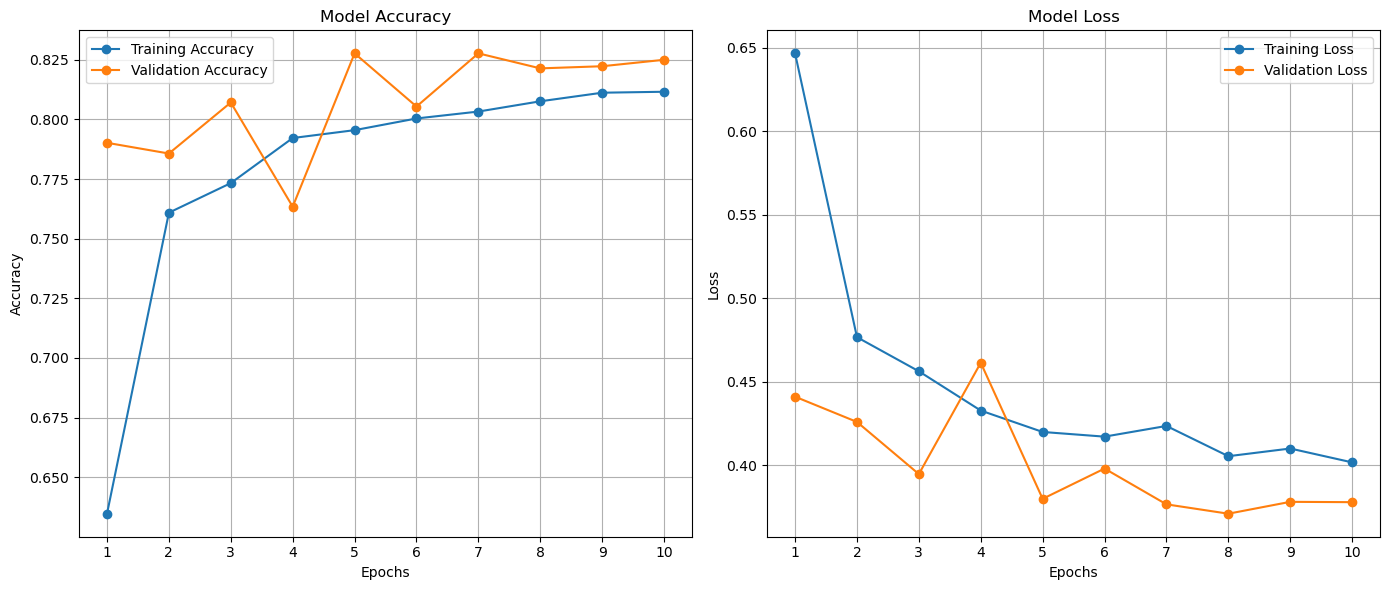

Plot saved to: C:\Users\lamim\Desktop\N_Thesis\BMR_CNN\RESULT_DenseNet121_2_2\training_plot.png


In [7]:
import matplotlib.pyplot as plt
import os
import csv

#extracting history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Create an output directory
output_dir = "my_results"
os.makedirs(output_dir, exist_ok=True)
csv_path = os.path.join(output_dir, "training_log.csv")
with open(csv_path, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["Epoch", "Train Accuracy", "Val Accuracy", "Train Loss", "Val Loss"])
    for epoch in epochs:
        writer.writerow([
            epoch,
            train_accuracy[epoch-1],
            val_accuracy[epoch-1],
            train_loss[epoch-1],
            val_loss[epoch-1]
        ])

# Plot
plt.figure(figsize=(14, 6))

# Subplot for Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.grid()

# Subplot for Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()
plt.grid()

plt.tight_layout()
output_dir = r"C:\Users\lamim\Desktop\N_Thesis\BMR_CNN\RESULT_DenseNet121_2_2"
os.makedirs(output_dir, exist_ok=True)

fig_path = os.path.join(output_dir, "training_plot.png")
plt.savefig(fig_path, dpi=300)
plt.show()

print(f"Plot saved to: {fig_path}")

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1.0/255)  # Normalize test images

test_dataset = test_datagen.flow_from_directory(
    "C:/Users/lamim/Desktop/N_Thesis/split_dataset3/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)


Found 1130 images belonging to 2 classes.


In [10]:
results = model.evaluate(test_dataset)  # Evaluate the test dataset
test_acc = results[1] 

print(f"Test Accuracy: {test_acc:.4f}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 560ms/step - accuracy: 0.7750 - loss: 0.4286 - precision: 0.7750 - recall: 0.7750
Test Accuracy: 0.7750


In [12]:
test_acc, test_precision, test_recall = results  # Unpack all metrics

print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")


Test Accuracy:0.7750
Test Precision: 0.7750
Test Recall: 0.7750
